# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [64]:
# set up lists to hold reponse info
cit = []
lat = [] 
lng = [] 
maxtemp = [] 
hum = []
cloud = [] 
windsp = [] 
country = [] 
date =[]
r = 0
print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()    
    if (response['cod']) == 200:
        r = r+1
        print(f"Processing Record {r} of Set 1 | {city}")
        cit.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windsp.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    else:
        print(f" City : {city} not found. Skipping...") 
    
# create a dictionary frame from the information gaher
cityData = {
    "City": cit,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": windsp,
    "Country": country,
    "Date": date,    }

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | vila
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | yamethin
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | pangai
 City : sidi qasim not found. Skipping...
Processing Record 13 of Set 1 | grindavik
Processing Record 14 of Set 1 | skovorodino
Processing Record 15 of Set 1 | raahe
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | biloela
Processing Record 19 of Set 1 | axim
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | kapoeta
Processing Record 22 of Set 1 | castro
Processing Re

Processing Record 178 of Set 1 | hwange
Processing Record 179 of Set 1 | datong
Processing Record 180 of Set 1 | muisne
Processing Record 181 of Set 1 | kundian
Processing Record 182 of Set 1 | mendeleyevsk
Processing Record 183 of Set 1 | ancud
Processing Record 184 of Set 1 | clyde river
Processing Record 185 of Set 1 | ribeira grande
 City : burica not found. Skipping...
Processing Record 186 of Set 1 | san juan
Processing Record 187 of Set 1 | morondava
 City : roberto payan not found. Skipping...
Processing Record 188 of Set 1 | cururupu
Processing Record 189 of Set 1 | aban
Processing Record 190 of Set 1 | tommot
Processing Record 191 of Set 1 | faya
Processing Record 192 of Set 1 | victoria
Processing Record 193 of Set 1 | morlaix
Processing Record 194 of Set 1 | cockburn town
Processing Record 195 of Set 1 | katsuura
 City : alotau not found. Skipping...
Processing Record 196 of Set 1 | moranbah
Processing Record 197 of Set 1 | lompoc
Processing Record 198 of Set 1 | koumac
Pro

Processing Record 358 of Set 1 | maltahohe
Processing Record 359 of Set 1 | kyra
Processing Record 360 of Set 1 | sao gabriel da cachoeira
Processing Record 361 of Set 1 | zhigansk
Processing Record 362 of Set 1 | ovre ardal
Processing Record 363 of Set 1 | airai
Processing Record 364 of Set 1 | santo antonio do ica
Processing Record 365 of Set 1 | tyukhtet
Processing Record 366 of Set 1 | dakar
Processing Record 367 of Set 1 | jumla
Processing Record 368 of Set 1 | lenoir city
Processing Record 369 of Set 1 | hamilton
Processing Record 370 of Set 1 | port antonio
Processing Record 371 of Set 1 | hambantota
Processing Record 372 of Set 1 | araouane
Processing Record 373 of Set 1 | saint anthony
Processing Record 374 of Set 1 | derzhavinsk
Processing Record 375 of Set 1 | bengkulu
Processing Record 376 of Set 1 | monte alegre
 City : ye not found. Skipping...
Processing Record 377 of Set 1 | ondo
Processing Record 378 of Set 1 | torbay
Processing Record 379 of Set 1 | qasigiannguit
 Cit

Processing Record 540 of Set 1 | kalangala
Processing Record 541 of Set 1 | nerchinskiy zavod
Processing Record 542 of Set 1 | mount isa
Processing Record 543 of Set 1 | raton
Processing Record 544 of Set 1 | kieta
Processing Record 545 of Set 1 | isla aguada
Processing Record 546 of Set 1 | matara
Processing Record 547 of Set 1 | bograd
Processing Record 548 of Set 1 | saint-joseph
Processing Record 549 of Set 1 | port hedland
Processing Record 550 of Set 1 | ponta pora
Processing Record 551 of Set 1 | vanavara
Processing Record 552 of Set 1 | xianshuigu
Processing Record 553 of Set 1 | saint-louis
Processing Record 554 of Set 1 | sobolevo
Processing Record 555 of Set 1 | santa rosa
Processing Record 556 of Set 1 | zhicheng
Processing Record 557 of Set 1 | nokaneng
Processing Record 558 of Set 1 | srednekolymsk
Processing Record 559 of Set 1 | kamalpur
Processing Record 560 of Set 1 | sidney
Processing Record 561 of Set 1 | oyek
Processing Record 562 of Set 1 | sundumbili
Processing R

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# Convert city data to DataFrame
weather_data = pd.DataFrame(cityData)
weather_data.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [37]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,22.78,43,1,2.10,US,1592330932
1,rikitea,-23.12,-134.97,24.14,81,22,5.74,PF,1592331041
2,ushuaia,-54.80,-68.30,3.00,81,40,2.10,AR,1592331041
3,puerto ayora,-0.74,-90.35,26.00,61,40,8.20,EC,1592331041
4,vila,42.03,-8.16,16.67,74,51,4.02,PT,1592331042


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,18.945254,17.059229,20.572154,66.616462,45.043783,3.683170,1.592331e+09
std,33.459206,92.275485,8.396542,21.781249,36.484890,2.309275,8.719929e+01
min,-54.800000,-179.170000,0.140000,3.000000,0.000000,0.180000,1.592330e+09
25%,-9.355000,-67.930000,14.440000,51.000000,6.000000,1.975000,1.592331e+09
50%,22.890000,21.780000,22.000000,72.000000,40.000000,3.250000,1.592331e+09
75%,46.550000,100.395000,26.225000,83.000000,75.000000,5.100000,1.592331e+09
max,78.220000,178.420000,44.000000,100.000000,100.000000,14.900000,1.592331e+09


In [41]:
# check if there are no cities that have humidity > 100%.
weather_data[weather_data['Humidity'] > 100]['Humidity'].count()

0

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [42]:
#  Get the indices of cities that have humidity over 100%.
HumOver100 = weather_data.index[weather_data['Humidity'] > 100]
HumOver100

Int64Index([], dtype='int64')

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [50]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(HumOver100, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,22.78,43,1,2.10,US,1592330932
1,rikitea,-23.12,-134.97,24.14,81,22,5.74,PF,1592331041
2,ushuaia,-54.80,-68.30,3.00,81,40,2.10,AR,1592331041
3,puerto ayora,-0.74,-90.35,26.00,61,40,8.20,EC,1592331041
4,vila,42.03,-8.16,16.67,74,51,4.02,PT,1592331042


In [51]:
# Extract relevant fields from the data frame and rearrange
clean_city_data = clean_city_data.iloc[:,[0, 5, 7, 8,4,1,2,3,6]]
clean_city_data.reset_index(drop=True,inplace=True)
clean_city_data.rename_axis('City_ID',inplace=True)
clean_city_data.tail(1)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
570,manuk mangkaw,34,PH,1592331133,71,4.8,119.85,28.96,2.88


In [53]:
# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

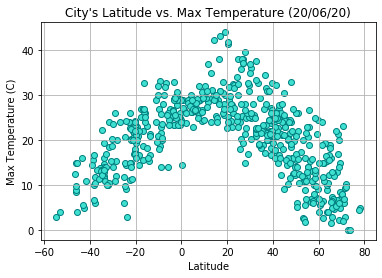

In [121]:
# Plot Latitude vs. Temperature
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal" )
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.title("City's Latitude vs. Max Temperature (20/06/20)")
plt.grid()
plt.savefig(f"../output_data/pic1.png")
plt.show()

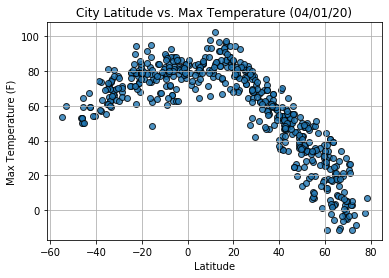

## Latitude vs. Humidity Plot

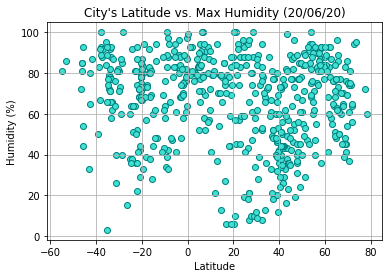

In [110]:
# Plot Latitude vs. Humidity
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City's Latitude vs. Max Humidity (20/06/20)")
plt.grid()
plt.savefig(f"../output_data/pic2.png")
plt.show()

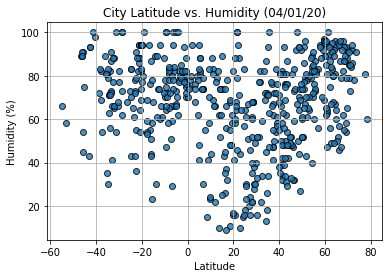

## Latitude vs. Cloudiness Plot

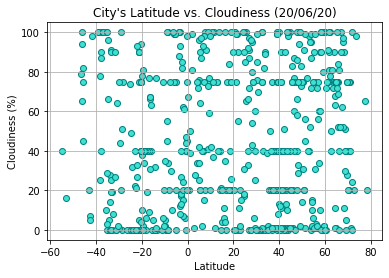

In [111]:
# Plot Latitude vs. Cloudiness
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City's Latitude vs. Cloudiness (20/06/20)")
plt.grid()
plt.savefig(f"../output_data/pic3.png")
plt.show()

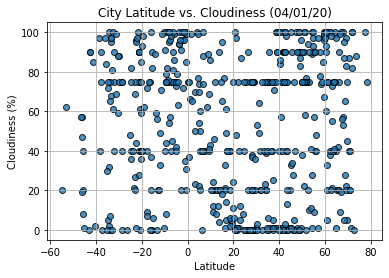

## Latitude vs. Wind Speed Plot

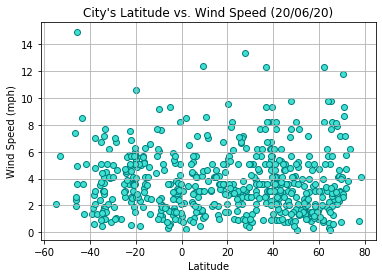

In [112]:
# Plot Latitude vs. Wind Speed
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City's Latitude vs. Wind Speed (20/06/20)")
plt.grid()
plt.savefig(f"../output_data/pic4.png")
plt.show()

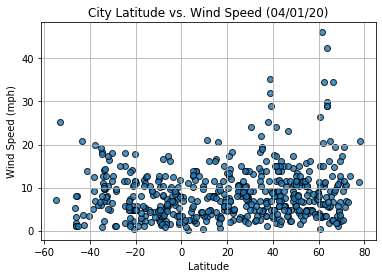

## Linear Regression

In [117]:
# OPTIONAL: Create a function to create Linear Regression plots
def my_plot_function(data_frame_df,item,chart_name):

    x1_values = data_frame_df['Lat']
    y1_values = data_frame_df[item]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
    rSqr = rvalue*rvalue
    print(f"The r-squared is: {rSqr}")
    
    regress_values = x1_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    scataxis = plt.subplot()
    scataxis.scatter(x1_values, y1_values, color = "turquoise", edgecolors= "teal")
    scataxis.set_ylim([0-(max(y1_values)*0.05), max(y1_values)*1.1])
    
    plt.plot(x1_values,regress_values,"r-", alpha = .5, color='red')
    plt.annotate(line_eq,(min(x1_values),5),fontsize=12,color="red")

    plt.grid(alpha = .2)
    plt.xlabel('Latitude')
    plt.ylabel(item)
    plt.title(f'Latitude vs. {item} {chart_name}')
    
    plt.savefig(f"../output_data/{item}{chart_name}.png")
    plt.show()  

In [118]:
# Create Northern Hemisphere DataFrames
Northern_df = clean_city_data[clean_city_data["Lat"]>0]
Northern_df.tail(1)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
570,manuk mangkaw,34,PH,1592331133,71,4.8,119.85,28.96,2.88


In [119]:
# Create Southern Hemisphere DataFrames
Southern_df = clean_city_data[clean_city_data["Lat"]<=0]
Southern_df.tail(1)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
569,coquimbo,75,CL,1592331133,71,-29.95,-71.34,14.0,4.1


The r-squared is: 0.5555734253586333


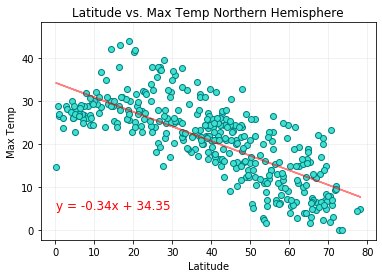

The r-squared is: 0.6089294254607538


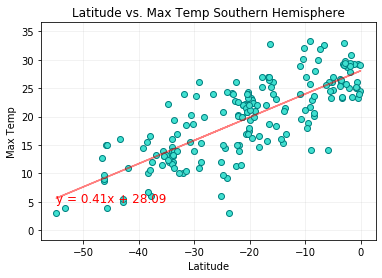

The r-squared is: 0.0014677167035778553


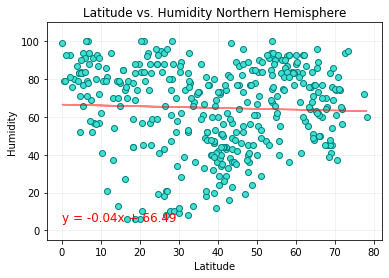

The r-squared is: 0.00018654121900117635


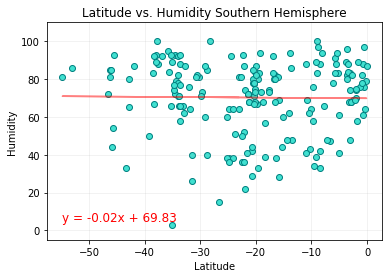

The r-squared is: 0.00011843989751051812


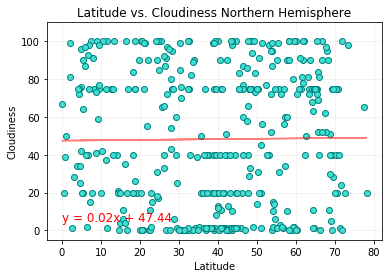

The r-squared is: 0.000859175472256694


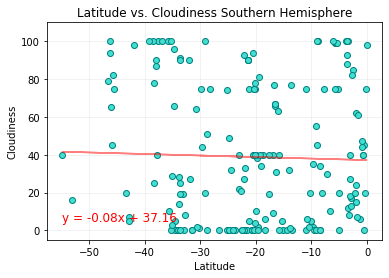

The r-squared is: 2.0810985521584264e-05


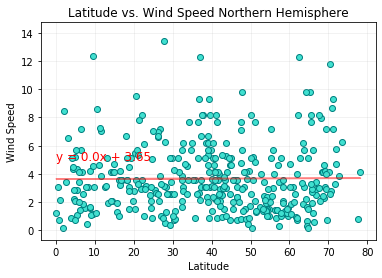

The r-squared is: 0.008728287065074957


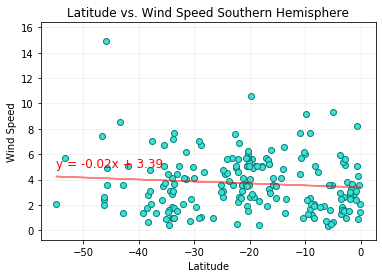

In [120]:
# Call the function to create charts for both Northern and Soujthern Hemisphere 
charts = ['Max Temp','Humidity','Cloudiness', 'Wind Speed']
n_north = 'Northern Hemisphere'
n_south = 'Southern Hemisphere'

for item in charts :
    my_plot_function(Northern_df,item,n_north)
    my_plot_function(Southern_df,item,n_south)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


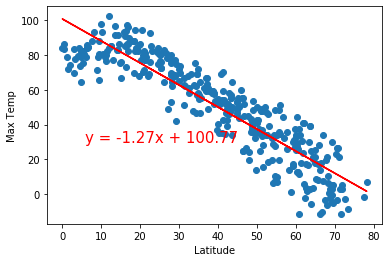

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


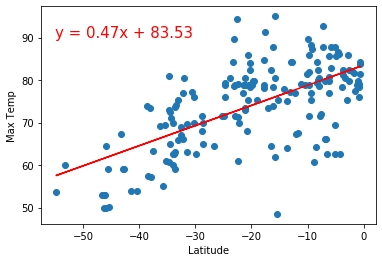

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


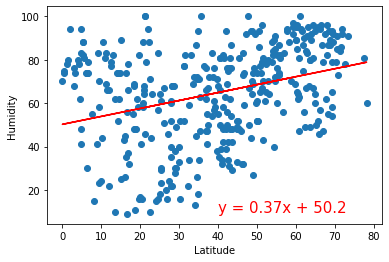

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


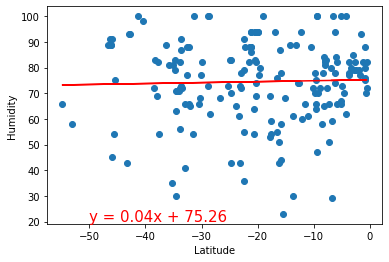

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


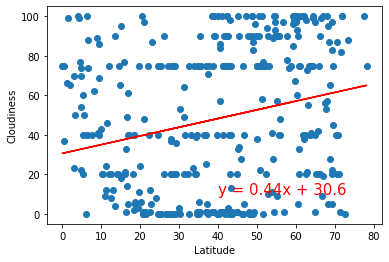

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


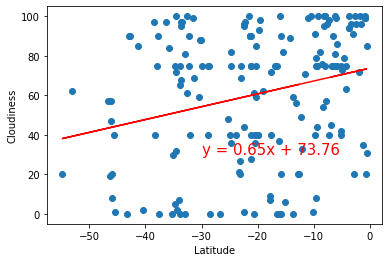

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


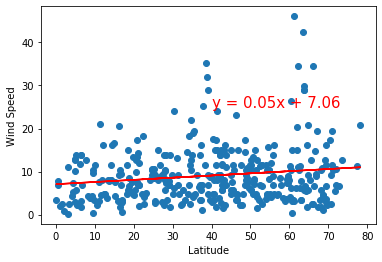

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


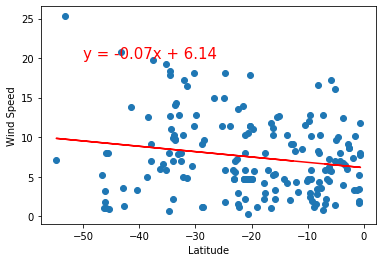